In [36]:
import pandas as pd
from pandas import Series, DataFrame

In [37]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
# Who were the passengers on the titanic?
# ---------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# so we can see all in the notebook

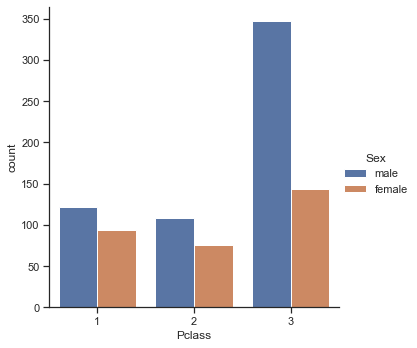

In [77]:
sns.catplot(data=titanic_df, x = 'Pclass', kind ='count', hue = 'Sex' )


In [94]:
#sekarang kita mau tambah "children" ke dalam kategori Sex (male,female,children)
#kita pakai tehnik bikin function
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [95]:
# Let's see if this worked, check out the first ten rows
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


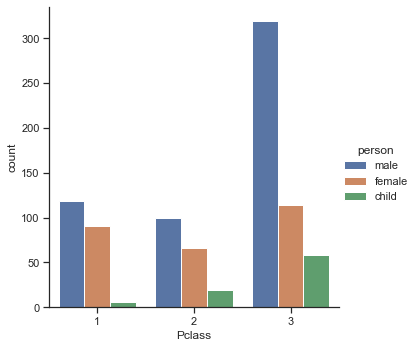

In [96]:
sns.catplot(data=titanic_df, x = 'Pclass', kind ='count', hue = 'person' )

<AxesSubplot:>

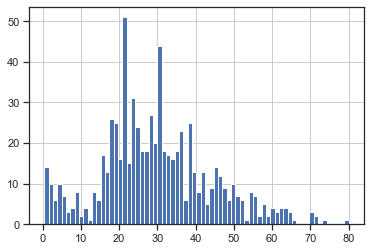

In [97]:
titanic_df['Age'].hist(bins=70)

<AxesSubplot:>

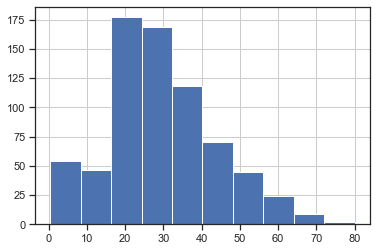

In [108]:
titanic_df['Age'].hist()

In [111]:
# We could also get a quick overall comparison of male,female,child
titanic_df ['person'].value_counts


<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: person, Length: 891, dtype: object>

In [113]:
titanic_df ['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

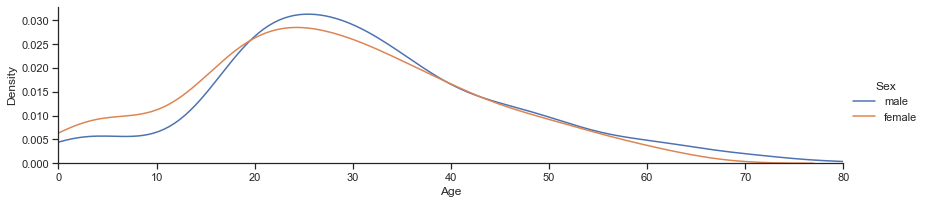

In [116]:
# Cara lain untuk memvisualisasikan data adalah dengan menggunakan FacetGrid untuk memplot beberapa kedplot pada satu plot
# 1. Set the figure equal to a facetgrid with the pandas dataframe sebagai data source, set the hue, lalu ubah the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
# 2. Next use map untuk plot SEMUA possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= False)
# 3. Set x max limit by the oldest passenger
oldest = titanic_df['Age'].max()
# 4. umur tidak mungkin negative , jadi set the x lower limit at 0
fig.set(xlim=(0,oldest))
# 5. Finally add a legend untuk keluarin graph
fig.add_legend()

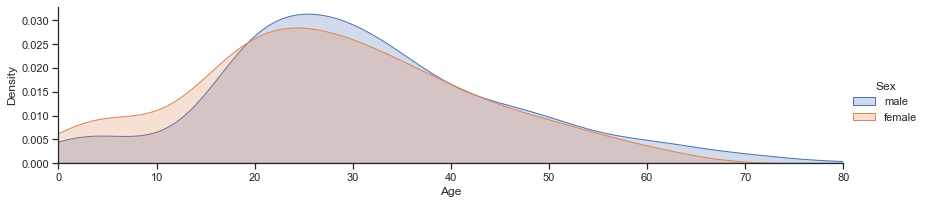

In [118]:
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
# jika shade = true
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

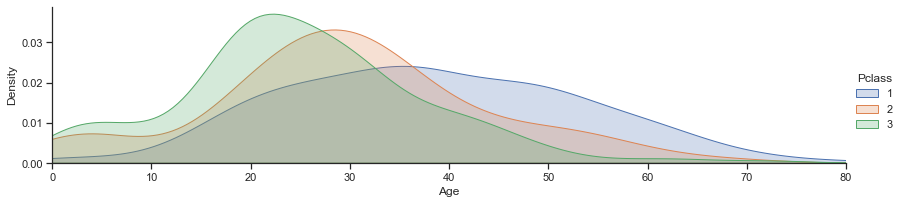

In [119]:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

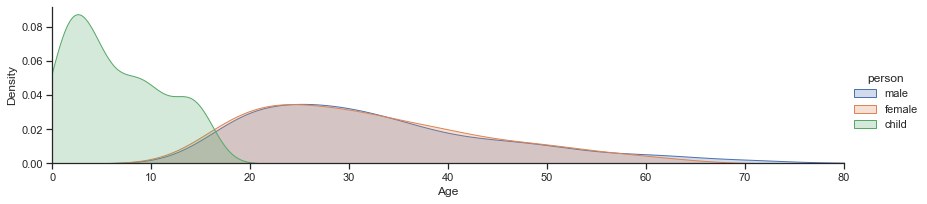

In [120]:
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
# jika shade = true
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [121]:
# lihat head dataset, males scroll
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [122]:
# Rapiin dataset yang ada isi 'NaN'
# create a new object, deck
deck = titanic_df['Cabin'].dropna()
# df.dropna(thresh=2)  buang baris yg terdapat 2 NaN

In [123]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [124]:
# 1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
# 2.) What deck were the passengers on and how does that relate to their class?
# 3.) Where did the passengers come from?
# 4.) Who was alone and who was with family?
# 5.) What factors helped someone survive the sinking?